# **Netflix Userbase Analysis**
**MILLARE, LUCKY OWELL U.**

**BSCS -IS- 3B**

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# **Part 1: Data Preprocessing**

In [ ]:
# LOAD DATASET
df = pd.read_csv('Netflix_Userbase.csv')

# Handling missing values and encoding categorical variables
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Subscription Type', 'Country', 'Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# **Part 2: Exploratory Data Analysis (EDA)**

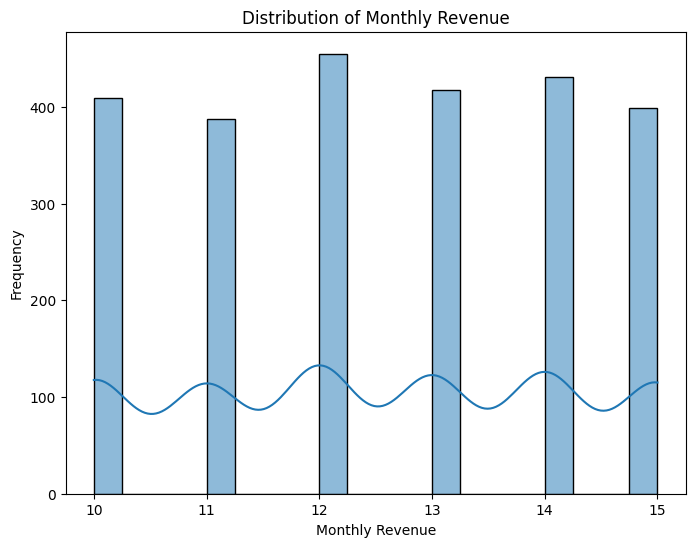

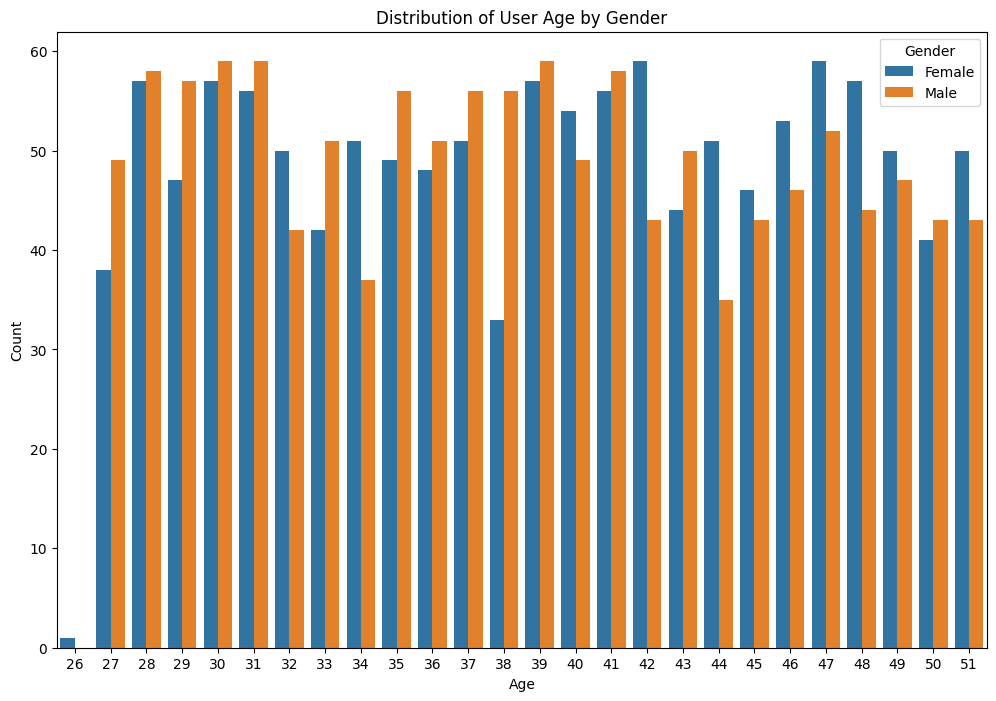

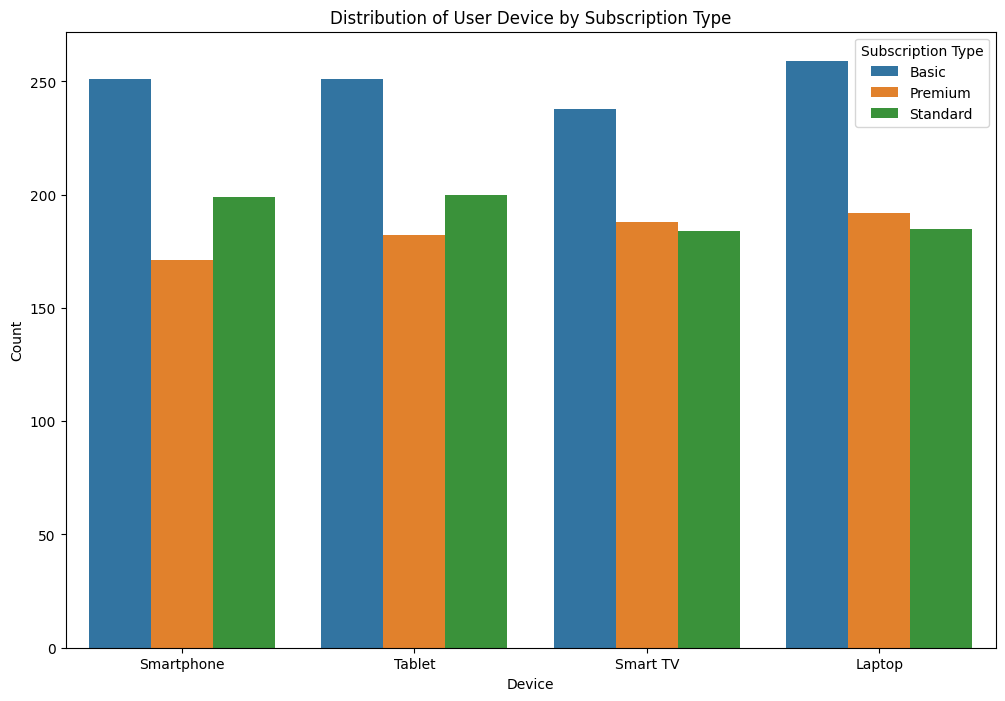

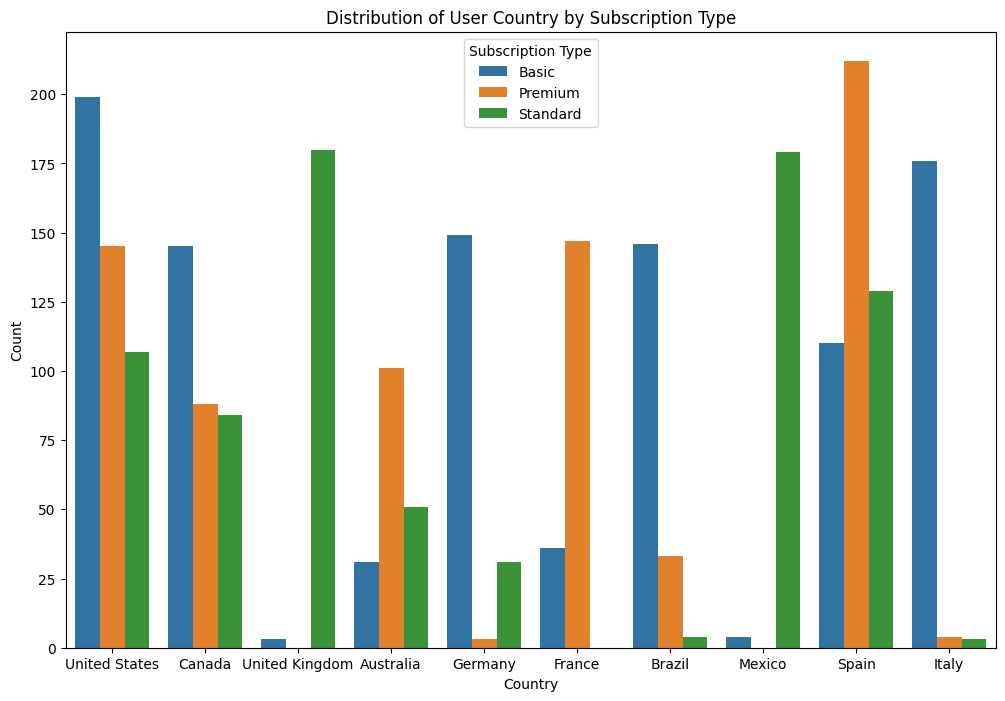

In [ ]:
df.describe()

# Visualizations
plt.figure(figsize=(8, 6))
sns.histplot(df['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Age', hue='Gender')
plt.title('Distribution of User Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Device', hue='Subscription Type')
plt.title('Distribution of User Device by Subscription Type')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country', hue='Subscription Type')
plt.title('Distribution of User Country by Subscription Type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
X = df.drop('Monthly Revenue', axis=1)
y = df['Monthly Revenue']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LinearRegression())])

# Fitting the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Model Evaluation
r2_lr = r2_score(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression R-squared: {r2_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression R-squared: -0.01247023971172001
Linear Regression RMSE: 1.6723040236276312


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
# Define Features
features = ['Age', 'Gender', 'Subscription Type', 'Country', 'Plan Duration']

# Generate Synthetic Feedback (Assuming random feedback generation)
df['Feedback'] = np.random.choice(['positive', 'negative'], size=len(df))

X = df[features]
y = df['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the logistic regression model pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])

# Fitting the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.524
Confusion Matrix: 
[[112 126]
 [112 150]]
Classification Report: 
              precision    recall  f1-score   support

    negative       0.50      0.47      0.48       238
    positive       0.54      0.57      0.56       262

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.52      0.52      0.52       500



# **Part 5: Comparative Analysis and Visualization**

In [ ]:
# Feature Importance for Linear Regression
linear_coef = clf.named_steps['classifier'].coef_
onehot_encoder = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = list(onehot_encoder.get_feature_names_out(categorical_features))
linear_features = numeric_features + encoded_feature_names
linear_feature_importance = pd.DataFrame({'Feature': linear_features, 'Coefficient': linear_coef[0]})
print("Feature Importance for Linear Regression:")
print(linear_feature_importance)

# Feature Importance for Logistic Regression
logistic_coef = clf.named_steps['classifier'].coef_
logistic_features = [features[0]] + encoded_feature_names
logistic_feature_importance = pd.DataFrame({'Feature': logistic_features, 'Coefficient': logistic_coef[0]})
print("\nFeature Importance for Logistic Regression:")
print(logistic_feature_importance)



Feature Importance for Linear Regression:
                       Feature  Coefficient
0                          Age    -0.034805
1      Subscription Type_Basic    -0.034662
2    Subscription Type_Premium     0.150732
3   Subscription Type_Standard    -0.104400
4            Country_Australia     0.026595
5               Country_Brazil     0.056566
6               Country_Canada    -0.035818
7               Country_France    -0.338992
8              Country_Germany     0.063304
9                Country_Italy     0.114013
10              Country_Mexico     0.093730
11               Country_Spain    -0.102509
12      Country_United Kingdom    -0.027611
13       Country_United States     0.162393
14               Gender_Female    -0.057257
15                 Gender_Male     0.068927

Feature Importance for Logistic Regression:
                       Feature  Coefficient
0                          Age    -0.034805
1      Subscription Type_Basic    -0.034662
2    Subscription Type_Premium   